In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import graphviz as gv
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
import datetime
import sklearn.metrics as skmetrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#Get dataframe
data = pd.read_csv('./data/car_insurance_cold_calls.csv')

In [3]:
#Encode the data
dataEncoded = pd.get_dummies(data,columns = ['Job'], drop_first=True)
##Encode Job, Marital, Education, Communication,
#combine last contact day + last contact month , outcome
dataEncoded = pd.get_dummies(dataEncoded,columns = ['Marital'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Education'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Communication'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Outcome'], drop_first=True)

In [4]:
dataEncoded.columns

Index(['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan',
       'LastContactDay', 'LastContactMonth', 'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'CallStart', 'CallEnd', 'CarInsurance',
       'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed', 'Marital_married',
       'Marital_single', 'Education_secondary', 'Education_tertiary',
       'Communication_telephone', 'Outcome_other', 'Outcome_success'],
      dtype='object')

In [5]:
#Feature Engineering
dataEncoded['CallEnd']=pd.to_datetime(dataEncoded['CallEnd'])
dataEncoded['CallStart']=pd.to_datetime(dataEncoded['CallStart'])
dataEncoded['CallDuration'] = dataEncoded['CallEnd'] - dataEncoded['CallStart']

In [6]:
#convert call duration into seconds
valuesToAddToDF = []
for calldurationstamp in dataEncoded['CallDuration']:
    
    formattedCallDurationStamp = (str(calldurationstamp).split(' ')[2])
    ftr = [3600,60,1]
    valueToAdd = sum([a*b for a,b in zip(ftr, map(int,formattedCallDurationStamp.split(':')))])
    valuesToAddToDF.append(valueToAdd)


dataEncoded['CallDurationSeconds'] = valuesToAddToDF

**Exploratory Data Testing**

In [7]:
numOfTrue = 0
numOfFalse = 0

for value in data['CarInsurance']:
    if value == True:
        numOfTrue +=1
    else:
        numOfFalse +=1
print(numOfTrue)
print(numOfFalse)

1604
2396


In [8]:
# Did_They_Buy_Car_Insurance_factor = {}
# for c in data.columns[1:-1]:
#     #c is key - column names
#     #data.groupby(c)['CarInsurance'].sum() is value
#     Did_They_Buy_Car_Insurance_factor[c] = data.groupby(c)['CarInsurance'].sum()

In [9]:
# i = 1
# plt.figure(figsize=(14, 35))
# for c, p in Did_They_Buy_Car_Insurance_factor.items():
#     #10 rows of plots, 2 columns
#     plt.subplot(10, 2, i)
#     i += 1
#     plt.bar(p.index, p.values)
#     plt.title('Did They Buy Car Insurance Against {}'.format(c))

In [10]:
data.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

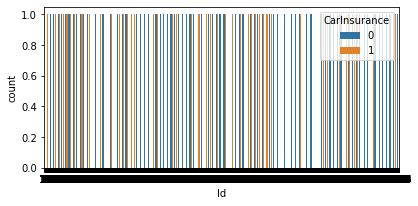

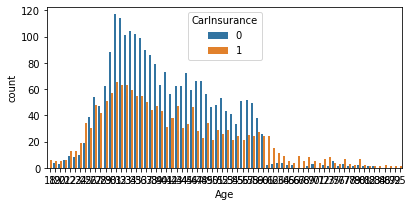

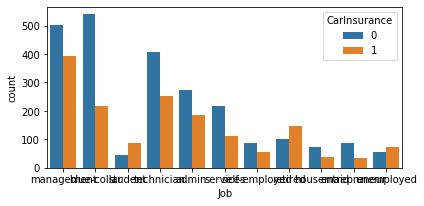

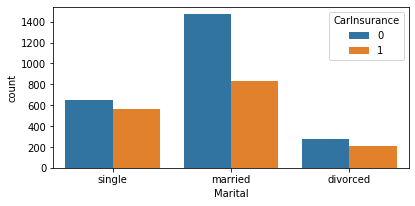

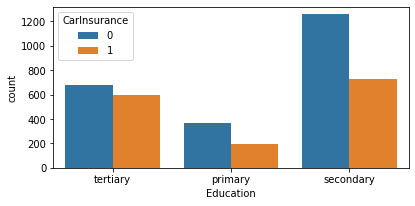

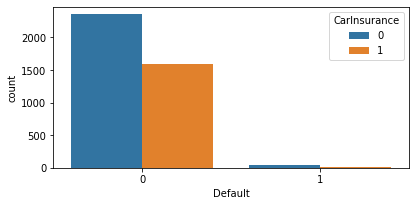

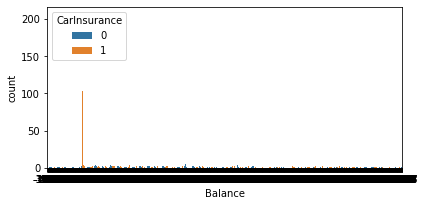

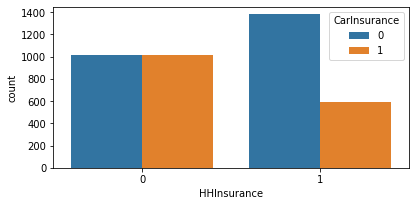

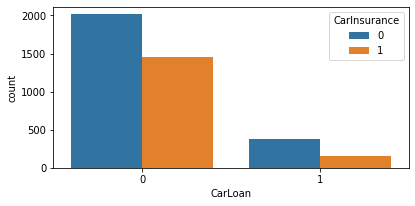

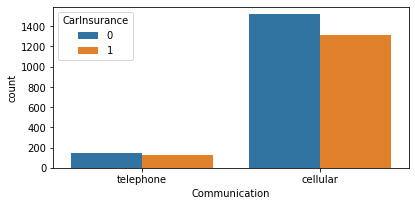

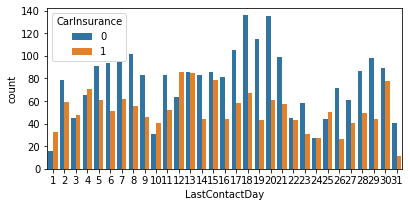

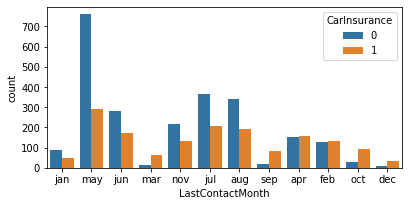

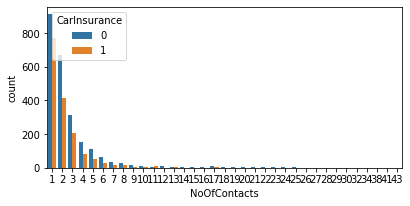

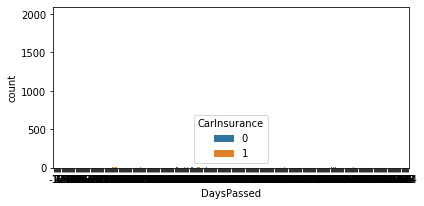

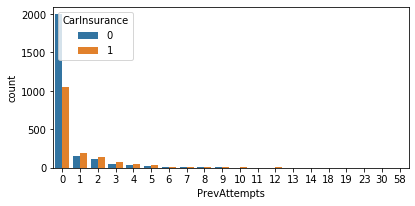

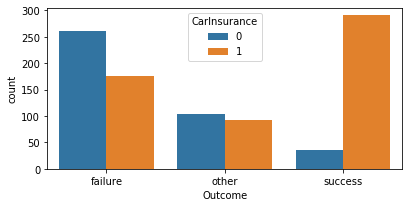

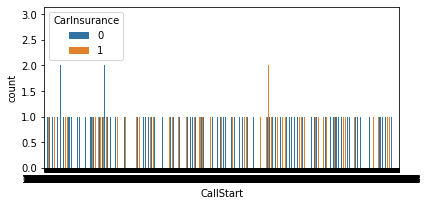

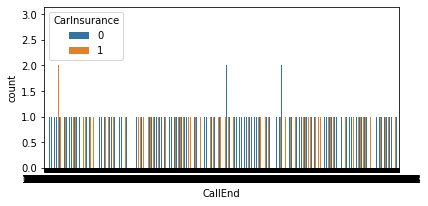

In [11]:
listOfColumns = ['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd']
i=1
for eachColumn in listOfColumns:
    plt.figure(figsize=(14, 35))
    plt.subplot(10, 2, i)
    i += 1
    sns.countplot(eachColumn, hue='CarInsurance', data=data)
    plt.show()

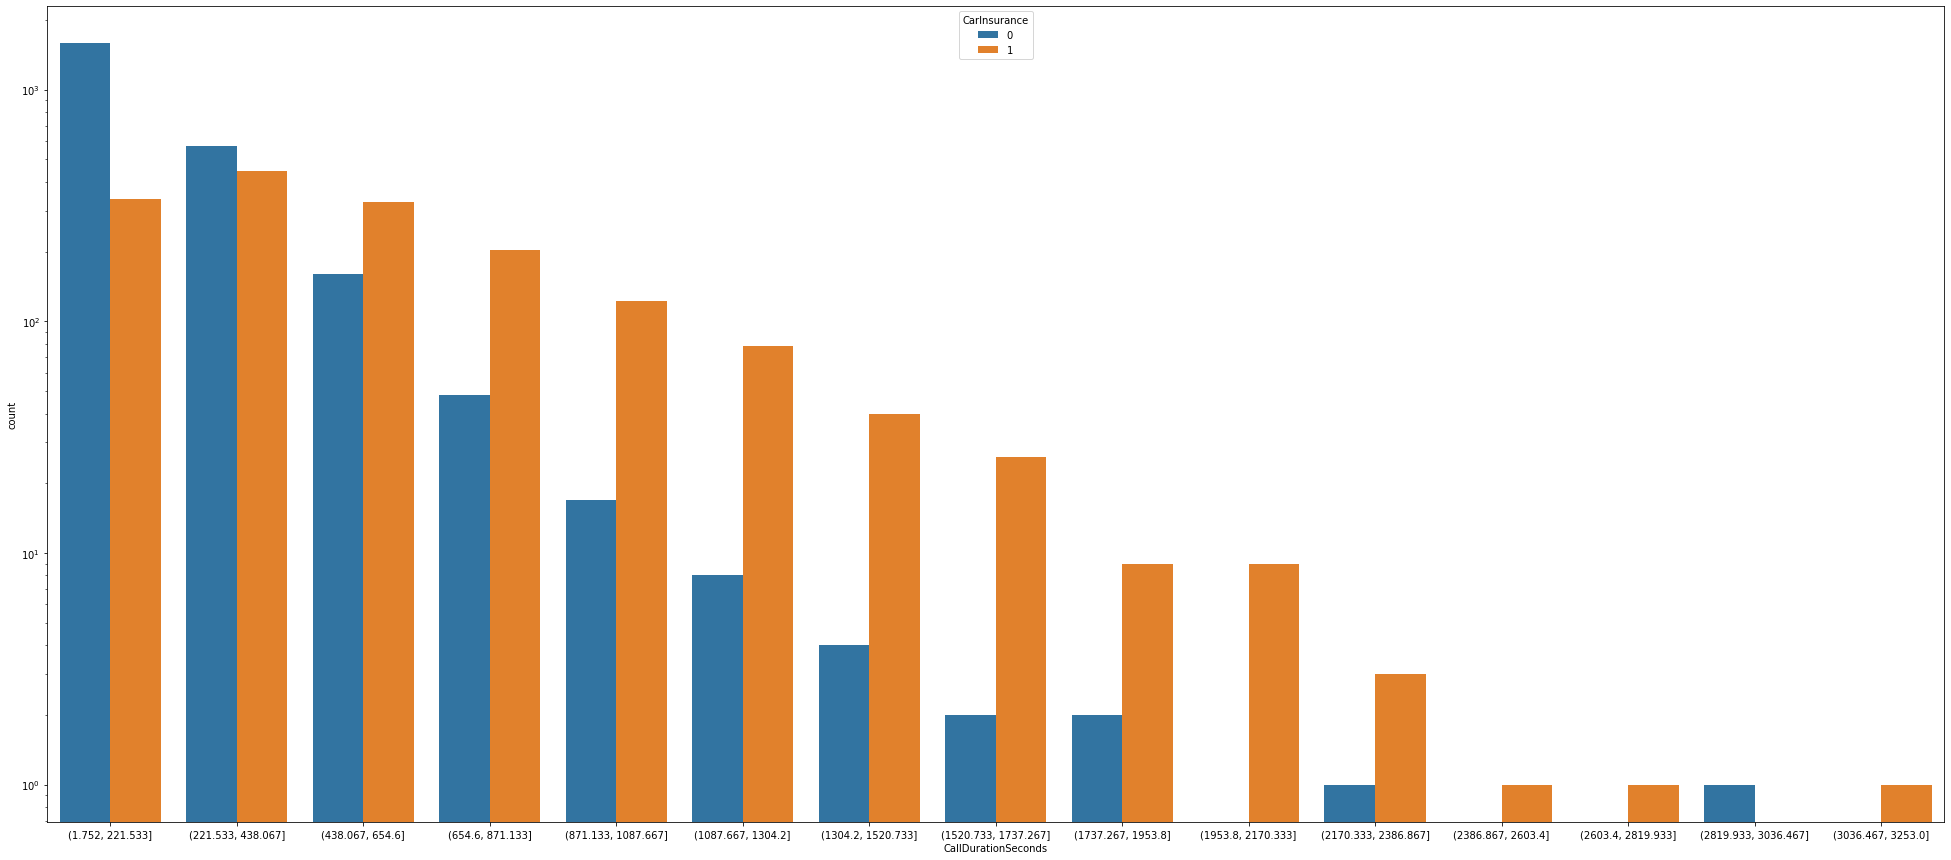

In [12]:
dataEncoded.sort_values("CallDurationSeconds", axis = 0, ascending = True, 
                 inplace = True, na_position ='last')

valuesToAddToDF.sort()

callDurationBins=pd.cut(dataEncoded['CallDurationSeconds'],15)
#print(callDurationBins)
plt.figure(figsize=(34,15))
sns.countplot(callDurationBins, hue='CarInsurance', data=dataEncoded)
plt.yscale('log')

In [13]:
##add independent and dependent variables to x and y respectively 
x=dataEncoded[['Age', 'Balance', 'HHInsurance', 'CarLoan',
        'NoOfContacts', 'DaysPassed',
       'PrevAttempts', 'Job_blue-collar', 'Job_entrepreneur', 'Job_housemaid',
       'Job_management', 'Job_retired', 'Job_self-employed', 'Job_services',
       'Job_student', 'Job_technician', 'Job_unemployed',
       'Communication_telephone', 'Outcome_other', 'Outcome_success', 'CallDurationSeconds']]
y=dataEncoded['CarInsurance']

In [14]:
#Create list of regressor
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
dtr5 = DecisionTreeClassifier(max_depth=5)
dtr10 = DecisionTreeClassifier(max_depth=10)
dtr15=DecisionTreeClassifier(max_depth=15)
rfr5 = RandomForestClassifier(max_depth=5, n_jobs = -1, n_estimators=2000)
rfr10 = RandomForestClassifier(max_depth=10, n_jobs = -1, n_estimators=2000)
rfr15 = RandomForestClassifier(max_depth=15, n_jobs = -1, n_estimators=2000)
rfr20 = RandomForestClassifier(max_depth=20, n_jobs = -1, n_estimators=2000)
rfr100 = RandomForestClassifier(max_depth=100, n_jobs = -1, n_estimators=2000)
gb5 = GradientBoostingClassifier(max_depth=5, n_estimators=2000)
gb10 = GradientBoostingClassifier(max_depth=10, n_estimators=2000)
gb15 = GradientBoostingClassifier(max_depth=15, n_estimators=2000)

In [53]:
zz = dict(zip(regressor_dictionary.keys(), ['a']))
zz

{'Logistic Regression': 'a'}

In [56]:
mydict = {'Logistic Regression': [],
         'Decision Tree depth 15': []}

In [57]:
mydict

{'Logistic Regression': [], 'Decision Tree depth 15': []}

In [51]:
regressor_dictionary

{'Logistic Regression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=10000,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'Decision Tree depth 15': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
                        max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=None, splitter='best')}

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    401
1    266
Name: CarInsurance, dtype: int64
0    403
1    264
Name: CarInsurance, dtype: int64
0    393
1    274
Name: CarInsurance, dtype: int64
0    405
1    262
Name: CarInsurance, dtype: int64
0    409
1    257
Name: CarInsurance, dtype: int64
0    385
1    281
Name: CarInsurance, dtype: int64
For Logistic Regression the average score is 80.37542790166478
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
0    404
1    263
Name: CarInsurance, dtype: int64
0    407
1    260
Name: CarInsurance, dtype: int64
0    423
1    244
Name: CarInsurance, dtype: int64
0    377
1    290
Name: CarInsurance, dtype: int64
0    391
1    275
Name: CarInsurance, dtype: int64
0    394
1    272
Name: CarInsurance, dtype: int64
For Decision Tree depth 15 the average score is 75.17547532540037
+++++++++++++++++++++++++

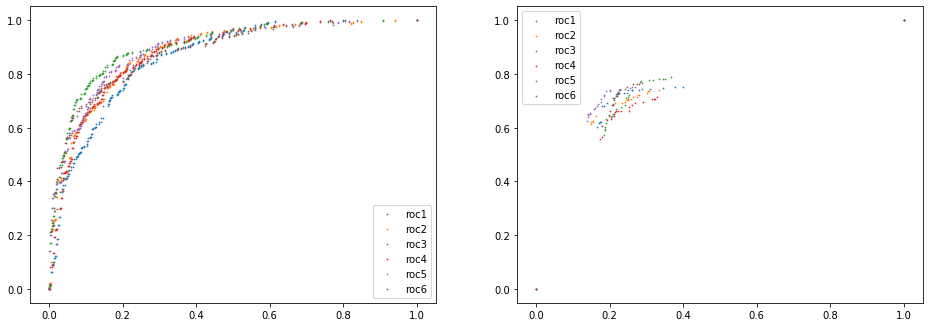

In [59]:
#Create dictionary of regressors 
regressor_dictionary = {'Logistic Regression':lr,
                        #'Decision Tree depth 5':dtr5,
                        #'Decision Tree depth 10': dtr10,
                        'Decision Tree depth 15': dtr15,
                        #'Random Forest depth 5':rfr5,
                        #'Random Forest depth 10':rfr10,
                        #'Random Forest depth 15':rfr15,
                        #'Random Forest depth 20':rfr20,
                        #'Random Forest depth 100':rfr100,
                        #"Gradient Boosting depth 5": gb5,
                        #"Gradient Boosting depth 10":gb10,
                        #"Gradient Boosting depth 15":gb15,
                       }

kf = KFold(n_splits = 6, shuffle=True)

plt.figure(figsize=(16, 12))
j = 1

for key, regressor in regressor_dictionary.items():
    plt.subplot(2, 2, j)
    listOfAccuracyScore = []
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    i=1
    for train_idx, test_idx in kf.split(x, y):
        x_train, y_train, x_test, y_test = x.iloc[train_idx], y.iloc[train_idx], \
        x.iloc[test_idx], y.iloc[test_idx]
    
        regressor.fit(x_train, y_train)
        y_predicted = regressor.predict(x_test)
        accuracy = (skmetrics.accuracy_score(y_test, y_predicted) * 100)
        listOfAccuracyScore.append(accuracy)
        
        
        #################################################################################
        #Uncomment for ROC Curves
        fpr, tpr, thresholds=skmetrics.roc_curve(y_test, regressor.predict_proba(x_test)[:, 1])
        mydict[key].append(pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': thresholds}))
        #fpr, tpr, thresholds=skmetrics.roc_curve(y_test, regressor.predict_proba(x_test)) ##looked at changing the thresholds
        #plt.figure(figsize=(15,8))
        #plt.subplot(3,3,i)
        plt.scatter(fpr,tpr, label='roc{}'.format(i), s=0.5)
        #plt.show()
        i+=1
        print(y_test.value_counts())
        #################################################################################
        
        #################################################################################
        #Uncomment for Individual confusion matrices
        #print("===============================================================")
        #print("CONFUSION MATRIX for " + str(regressor) + " ==== \n" + str(skmetrics.confusion_matrix(y_test, y_predicted)))
        #print('Our model has correctly classified {0}% of all observations in the test data' \
                  #.format(skmetrics.accuracy_score(y_test, y_predicted) * 100))
        #print("===============================================================")
        #################################################################################
    average_accuracy_score = (sum(listOfAccuracyScore) / len(listOfAccuracyScore))
    plt.legend()
    
    j += 1
    print("For " + key + " the average score is " + str(average_accuracy_score))
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        

In [63]:
mytable = mydict['Logistic Regression'][2]

In [69]:
mytable[(mytable['tpr'] > 0.80) & (mytable['fpr'] < 0.18)]

,fpr,tpr,threshold
82,0.145038,0.802920,0.378256
83,0.147583,0.802920,0.377005
84,0.147583,0.810219,0.375950
85,0.152672,0.810219,0.369062
86,0.152672,0.824818,0.366283
87,0.157761,0.824818,0.360965
88,0.157761,0.832117,0.357174
89,0.170483,0.832117,0.345378
90,0.170483,0.835766,0.342760
91,0.173028,0.835766,0.342084


In [26]:
#Experimenting with the threshold

In [31]:
#Using predict proba to affect the threshold
regressor_dictionary = {'Logistic Regression':lr,
                        #'Decision Tree depth 5':dtr5,
                       #'Decision Tree depth 10': dtr10,
                       'Decision Tree depth 15': dtr15,
                        #'Random Forest depth 5':rfr5,
                        #'Random Forest depth 10':rfr10,
                        #'Random Forest depth 15':rfr15,
                        #'Random Forest depth 20':rfr20,
                        #'Random Forest depth 100':rfr100,
                       "Gradient Boosting depth 5": gb5}
kf = KFold(n_splits = 4, shuffle=True)


for key, regressor in regressor_dictionary.items():
    listOfAccuracyScore = []
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    for train_idx, test_idx in kf.split(x, y):
        i=1
        x_train, y_train, x_test, y_test = x.iloc[train_idx], y.iloc[train_idx], \
        x.iloc[test_idx], y.iloc[test_idx]
    
        regressor.fit(x_train, y_train)
        y_predicted = regressor.predict(x_test)
        accuracy = (skmetrics.accuracy_score(y_test, y_predicted) * 100)
        listOfAccuracyScore.append(accuracy)
        fpr, tpr, thresholds=skmetrics.roc_curve(y_test, y_predicted)
        yprobs = regressor.predict_proba(x_test)
        #print(yprobs)
        
        numberOfYes = 0
        numberOfNo = 0
        ##threshold##
        threshold = 0.6 #0.5 is default
        index = 0
        arrayInYPredictFormat=[]
        for placeholder in yprobs:
            #print(placeholder)
            num1 = str(placeholder).split(' ')[0]
            num1 = float(num1[1:]) #prob of getting 0
            num2 = str(placeholder).split(' ')[1]
            num2 = float(num2[:-1]) #prob of getting 1
            #print(num1)
            #print(num2)
            if num2 >threshold:
                numberOfYes+=1
                arrayInYPredictFormat.append(1)
            else:
                numberOfNo+=1
                arrayInYPredictFormat.append(0)


        #############################################
        #Uncomment to test if both arrays are same WHEN THRESHOLD = 0.5
        #print(arrayInYPredictFormat)
        #print("]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]")
        #print(y_predicted)
        #############################################
        
        ##############################################
        #To test if Y_Predicted is the same length as the array I created
        #print("THIS IS Y PREDICTED")        
        #print(y_predicted.size)
        #print("THIS IS MY ONE")
        #print(len(arrayInYPredictFormat))
        ##############################################
        
        #################################################################################
#         #Uncomment for Individual confusion matrices
#         print(skmetrics.confusion_matrix(y_test, arrayInYPredictFormat))
#         print('Our model has correctly classified {0}% of all observations in the test data' \
#                 .format(skmetrics.accuracy_score(y_test, arrayInYPredictFormat) * 100))
#         print("===============================================================")
        #################################################################################
        
        #################################################################################
#         ##Change threshold to 0.5 and compare y_predicted to arrayInYPredictFormat
#         print("CONFUSION MATRIX for " + str(regressor) + " ==== \n" + str(skmetrics.confusion_matrix(y_test, y_predicted)))
#         print('Our model has correctly classified {0}% of all observations in the test data' \
#                   .format(skmetrics.accuracy_score(y_test, y_predicted) * 100))
#         print("===============================================================")
        #################################################################################
       
#     print ("THE NUMBER OF YES", numberOfYes)
#     print ("THE NUMBER OF NO", numberOfNo)
        
        #fpr, tpr, thresholds=skmetrics.roc_curve(y_test, regressor.predict_proba(x_test))
        
        #plt.figure(figsize=(15,8))
        #plt.subplot(3,3,i)
        #plt.plot(fpr,tpr, c='r', label='roc')
        #i+=1
    average_accuracy_score = (sum(listOfAccuracyScore) / len(listOfAccuracyScore))
    #plt.show()
    print("For " + key + " the average score is " + str(average_accuracy_score))
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For Logistic Regression the average score is 80.4
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For Decision Tree depth 15 the average score is 75.65
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
For Gradient Boosting depth 5 the average score is 80.225
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


In [32]:
#Only True when threshold = 0.5
np.array_equal(y_predicted, arrayInYPredictFormat)

False